# Load Libraries

In [1]:
from datetime import datetime, timedelta
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
#import mpld3
%matplotlib inline

# Load the 7GB file and trim it

In [5]:
# Load it into a Dataframe using pandas
path = '../../data/311.csv'
df = pd.read_csv(path)
df.head()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8,17,18,20,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,21835749,11/07/2011 04:02:50 PM,11/07/2011 05:45:14 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11204,1539 WEST 9 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.609242,-73.982821,"(40.609242, -73.982821)"
1,21835751,11/07/2011 11:53:37 AM,11/07/2011 03:14:40 PM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11201,290 HICKS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692605,-73.997137,"(40.692605, -73.997137)"
2,21835752,11/07/2011 11:59:42 AM,11/09/2011 10:47:29 AM,DHS,DHS Advantage Programs,DHS Advantage - Tenant,Other Issue,Tenant Address,11220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21835753,11/07/2011 05:53:47 PM,11/07/2011 06:13:21 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10019,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762290,-73.986106,"(40.76229, -73.986106)"
4,21835754,11/07/2011 12:08:15 PM,11/07/2011 03:38:42 PM,DOF,Refunds and Adjustments,DOF Parking - Payment Issue,Status of Payment Adjustment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Action Updated Date',
       u'Resolution Description', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [8]:
len(df.columns)

53

In [9]:
# Drop columns not needed
df.drop(df.columns[[9,10,11,12,13,14,15,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,52]], axis=1, inplace=True)

In [11]:
# Drop null values from the whole dataset
df = df.dropna()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,21835749,11/07/2011 04:02:50 PM,11/07/2011 05:45:14 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11204,BROOKLYN,BROOKLYN,40.609242,-73.982821
1,21835751,11/07/2011 11:53:37 AM,11/07/2011 03:14:40 PM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11201,BROOKLYN,BROOKLYN,40.692605,-73.997137
3,21835753,11/07/2011 05:53:47 PM,11/07/2011 06:13:21 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10019,NEW YORK,MANHATTAN,40.762290,-73.986106
5,21835755,11/07/2011 07:47:15 PM,11/08/2011 12:13:05 AM,NYPD,New York City Police Department,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,10009,NEW YORK,MANHATTAN,40.726866,-73.979908
6,21835757,11/07/2011 09:11:39 PM,11/08/2011 04:53:53 AM,DOT,Department of Transportation,Broken Muni Meter,No Receipt,Street,10020,NEW YORK,MANHATTAN,40.759064,-73.978450
7,21835758,11/07/2011 11:13:31 PM,11/08/2011 12:45:39 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,10012,NEW YORK,MANHATTAN,40.729541,-73.999816
10,21835765,11/07/2011 04:36:17 AM,11/07/2011 11:29:18 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10455,BRONX,BRONX,40.819411,-73.911155
11,21835766,11/07/2011 11:49:44 AM,11/07/2011 02:08:47 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10039,NEW YORK,MANHATTAN,40.829866,-73.936778
13,21835768,11/07/2011 02:23:05 PM,12/05/2011 01:03:45 PM,DOT,Department of Transportation,Sidewalk Condition,Dismiss Violation Owner Fixed,Sidewalk,11229,BROOKLYN,BROOKLYN,40.593249,-73.957249
14,21835769,11/07/2011 08:27:09 PM,11/07/2011 11:19:14 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,10463,BRONX,BRONX,40.871843,-73.904435


In [12]:
# Check df size
df.shape

(11250861, 13)

In [ ]:
# Drop extra columns
df.drop(df.columns[[0,4,8,9]], axis=1, inplace=True)

In [83]:
# Drop rows with bad data input (~6000 lines) 
# Closed Year is a column created afterwards but I put it here just for grouping the data cleanup
df = df[~df['Closed Year'].isin([1900,2000,2001,2019,2023,2100])]

In [87]:
# Delete Closed Year column
del df['Closed Year']

In [13]:
# Drop rows in which call duration is negative. It doesn't make sense (~3000 lines)
df = df[df['Call Duration'] > 0]

In [14]:
# Check df size
df.shape

(7343313, 11)

In [14]:
df.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Borough,Latitude,Longitude
0,11/07/2011 04:02:50 PM,11/07/2011 05:45:14 PM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,BROOKLYN,40.609242,-73.982821
1,11/07/2011 11:53:37 AM,11/07/2011 03:14:40 PM,NYPD,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,BROOKLYN,40.692605,-73.997137
3,11/07/2011 05:53:47 PM,11/07/2011 06:13:21 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,MANHATTAN,40.762290,-73.986106
5,11/07/2011 07:47:15 PM,11/08/2011 12:13:05 AM,NYPD,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,MANHATTAN,40.726866,-73.979908
6,11/07/2011 09:11:39 PM,11/08/2011 04:53:53 AM,DOT,Broken Muni Meter,No Receipt,Street,MANHATTAN,40.759064,-73.978450


In [13]:
# Create a new csv 1GB
df.to_csv('../../data/311_filtered.csv', index=False )

# Bring the new filtered 1GB dataset

In [2]:
# Load it into a Dataframe using pandas
path = '../data/311_filtered.csv'
df = pd.read_csv(path)
df.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Borough,Latitude,Longitude
0,11/07/2011 04:02:50 PM,11/07/2011 05:45:14 PM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,BROOKLYN,40.609242,-73.982821
1,11/07/2011 11:53:37 AM,11/07/2011 03:14:40 PM,NYPD,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,BROOKLYN,40.692605,-73.997137
2,11/07/2011 05:53:47 PM,11/07/2011 06:13:21 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,MANHATTAN,40.762290,-73.986106
3,11/07/2011 07:47:15 PM,11/08/2011 12:13:05 AM,NYPD,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,MANHATTAN,40.726866,-73.979908
4,11/07/2011 09:11:39 PM,11/08/2011 04:53:53 AM,DOT,Broken Muni Meter,No Receipt,Street,MANHATTAN,40.759064,-73.978450


### Analyze the data

In [3]:
# Unique Categories of calls
print 'The unique categories are: %d \n\nThey are the following: \n%s' % (
    len(df.Descriptor.unique()), df.Descriptor.unique())

The unique categories are: 559 

They are the following: 
['No Access' 'Double Parked Blocking Traffic' 'Loud Music/Party'
 'Unauthorized Bus Layover' 'No Receipt' 'Blocked Sidewalk'
 'Banging/Pounding' 'Dismiss Violation Owner Fixed' 'Failed Street Repair'
 'With License Plate' 'Condition Attracting Rodents'
 'Blocked - Construction' 'HEAT' 'WATER-LEAKS' 'CABINETS' 'DOORS'
 'Sidewalk Consultation' 'MOLD' 'LOCKS' 'Defective Hardware' 'RADIATOR'
 'Rat Sighting' 'WINDOW GUARDS' 'Mouse Sighting' 'CEILING' 'BASIN/SINK'
 'WINDOWS' 'LIGHTING' 'DOORS/FRAME' 'Signs of Rodents'
 'Chemical Vapors/Gases/Odors' 'FLOOR' 'VERMIN'
 'St Name - Attached to Pole' 'No Parking, Standing, Stopping'
 'People Created Noise' 'Rough, Pitted or Cracked Roads' 'Dead/Dying Tree'
 'Branch Cracked and Will Fall' 'Dead Branches in Tree' 'CARBON MONOXIDE'
 'Posted Parking Sign Violation' 'Structure - Outdoors' 'SMOKE-DETECTOR'
 'WALLS' 'Overnight Commercial Storage' 'Blocked Hydrant'
 'Commercial Overnight Parking' '

### Group calls by frequency

In [3]:
# The 50 most frequent crimes
call_freq = df['Complaint Type'].groupby(df['Complaint Type']).count().sort_values(ascending=1).reset_index(name='count')
call_freq[100:]

,Complaint Type,count
100,Indoor Air Quality,18622
101,Vending,19104
102,Street Sign - Missing,20472
103,Traffic,20517
104,Fire Safety Director - F58,22652
105,Construction,24217
106,SAFETY,26469
107,Sidewalk Condition,28940
108,Dead Tree,30045
109,Food Establishment,30845


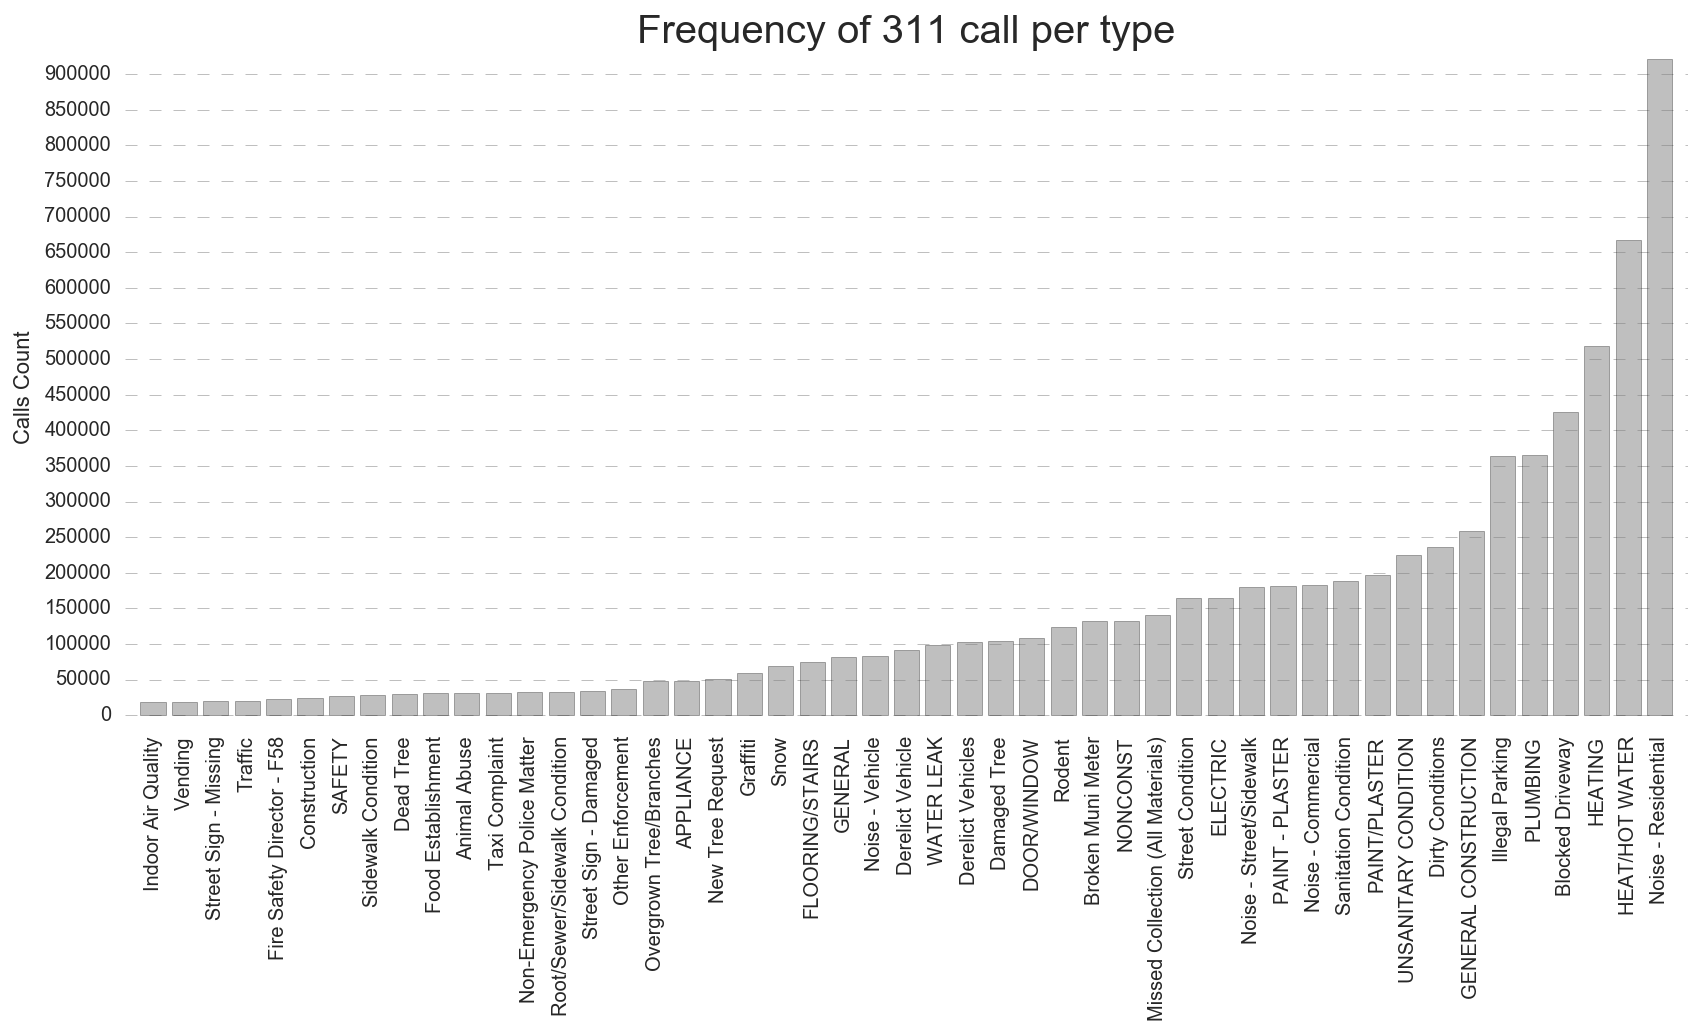

In [4]:
# Use full resolution of retina display
%config InlineBackend.figure_format = 'retina'

# use seaborn to set our graphing style. The style 'white' creates a white background for our graph
sns.set_style("white") 

# Assign x and y values
x = call_freq['Complaint Type'][100:]
y = call_freq['count'][100:]

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(14, 6))

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct call category and assign them to the x-axis
plt.yticks(np.arange(0, round(max(y),-4)+100000, 50000))
plt.xticks(x_pos, x, rotation='vertical')
plt.margins(0.01)

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

# Give labels and titles
plt.ylabel("Calls Count")
plt.title("Frequency of 311 call per type",fontsize=20)

# Show the barplot
plt.show()

###  See 311 calls over time

In [5]:
# Create a function that gets the year of a datetime string
def getYear(s):
    first_split = s.split(' ')[0]
    return int(first_split.split('/')[-1])

In [6]:
# Now create a new column named year and store the values of the above function
df['Created Year']= df['Created Date'].apply(lambda x: getYear(x))

In [7]:
# List the number of calls per year
call_freq_time = df.groupby('Created Year')['Created Year'].count().reset_index(name='count').sort_values(by='Created Year', ascending=1)
call_freq_time

,Created Year,count
0,2010,112864
1,2011,301833
2,2012,1174015
3,2013,1216733
4,2014,1424815
5,2015,1530831
6,2016,1364622
7,2017,382194


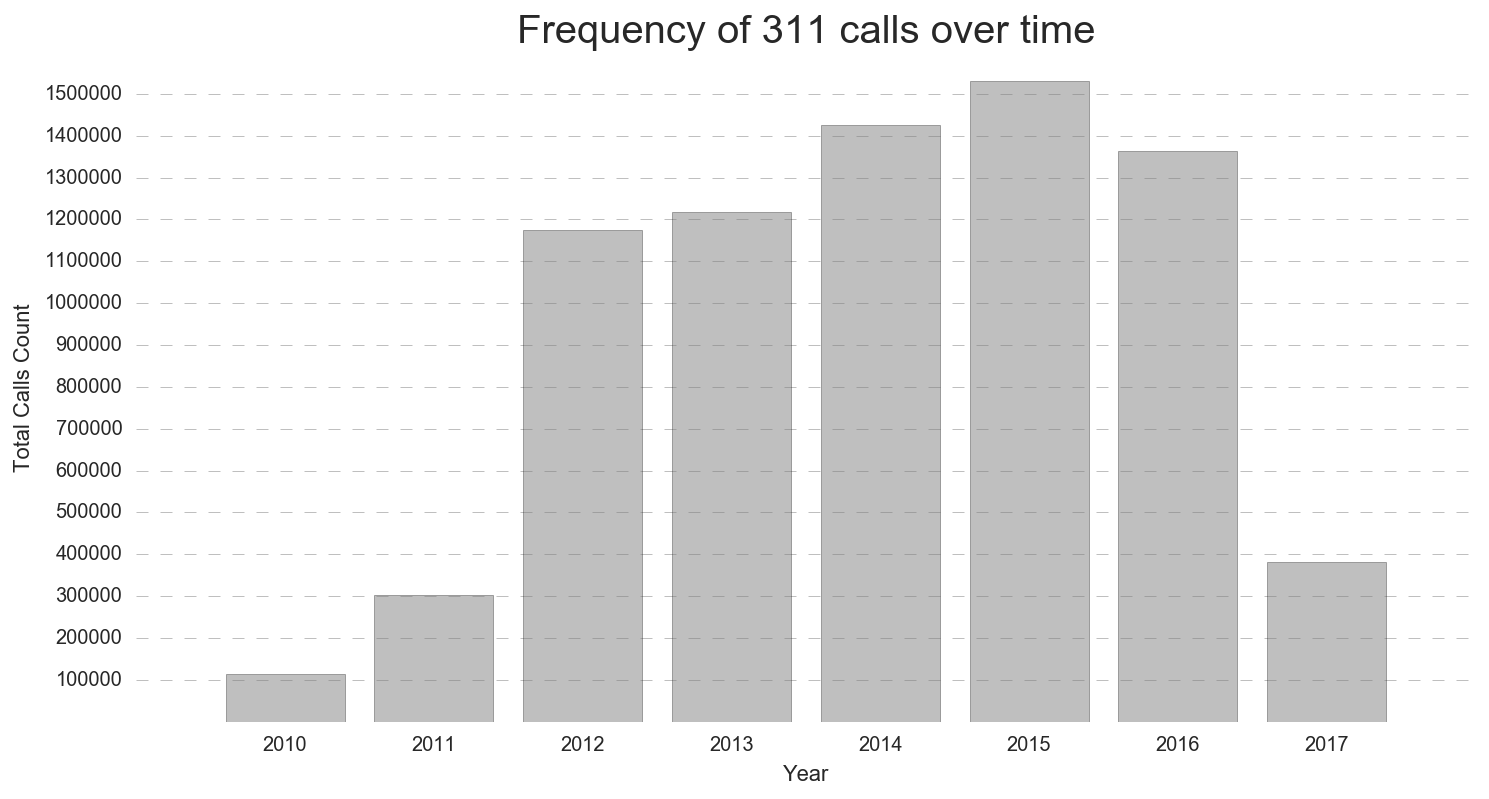

In [8]:
# Use full resolution of retina display
%config InlineBackend.figure_format = 'retina'

# use seaborn to set our graphing style. The style 'white' creates a white background for our graph
sns.set_style("white") 

# Assign x and y axes
x = call_freq_time['Created Year']
y = call_freq_time['count']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(12, 6))

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct call category and assign them to the x-axis
plt.yticks(np.arange(round(min(y),-5), round(max(y),-5)+100000, 100000))
plt.xticks(x_pos, x)

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

# Give labels and titles
plt.ylabel("Total Calls Count")
plt.xlabel("Year")
plt.title("Frequency of 311 calls over time",fontsize=20)

# Show the barplot
plt.show()

We see that the **frequency of calls is always increasing over the years**. Which means that the 311 service has to increase its effectiveness. Let's take a look at the call duration. We assume that if the service handles the situations faster over the years it means that it is improving.

### Check 311 effectiveness over time by checking the call duration

In [9]:
# Create function that calculate the time diff in minutes between created and closed date
def getCallDuration(created, closed):
    # Assign format and type
    time_format = "%m/%d/%Y %I:%M:%S %p"
    created_date = datetime.strptime(created, time_format)
    closed_date = datetime.strptime(closed, time_format)
    
    # Convert to unix timestamp
    created_date = time.mktime(created_date.timetuple())
    closed_date = time.mktime(closed_date.timetuple())
    
    # they are now in seconds, subtract and then divide by 60 to get minutes.
    return int(closed_date-created_date) / 60

In [10]:
# Now create a new column named Call Duration and store the values of the above function
df['Call Duration']= df[['Created Date','Closed Date']].apply(lambda x: getCallDuration(*x), axis=1)

Let's **create a boxlot** to further investigate the Call Duration column

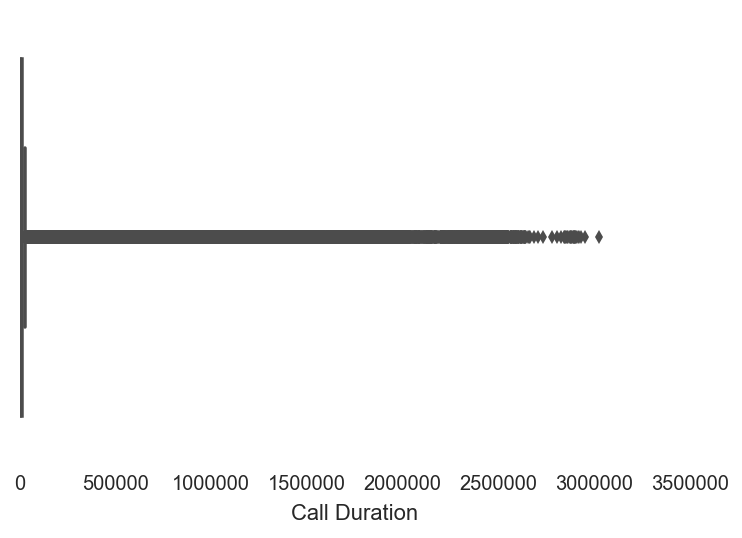

In [19]:
# Plot distribution of Call Duration
sns.boxplot(df['Call Duration'])

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

In [17]:
df['Call Duration'].describe()

count    7.343313e+06
mean     1.888269e+04
std      7.720338e+04
min      1.000000e+00
25%      2.530000e+02
50%      3.655000e+03
75%      1.169200e+04
max      3.027854e+06
Name: Call Duration, dtype: float64

It is clear that we have some outliers that will mess with the mean when we try to calculate it and base our assumption of effectiveness on that metric. So let's better base our comparison on the median of each year and see if it makes sense. But first let's see if we **create a boxplot for each year** how the distribution looks like.

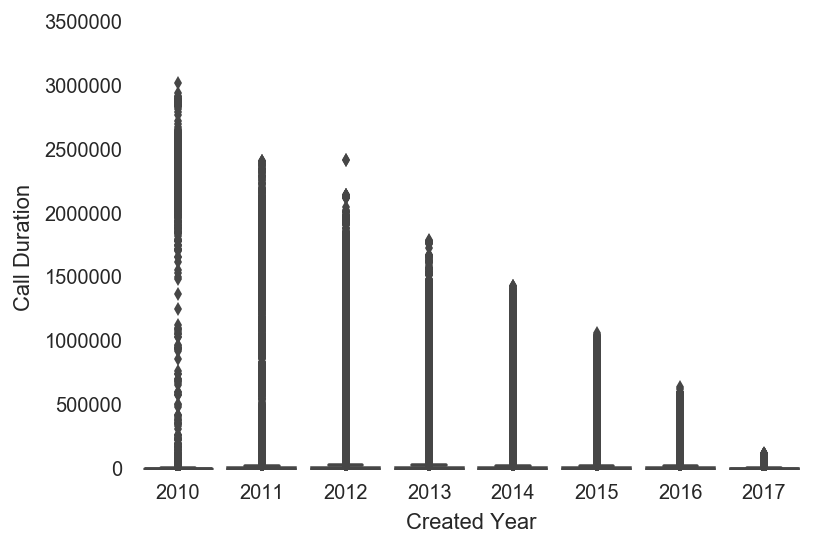

In [43]:
# Plot distribution of Call Duration by Year
sns.boxplot(df["Call Duration"], groupby=df["Created Year"])

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

Now it is visible that since 2010 the 311 department has been improved in call duration. There are **less outliers of high call duration out of the 75% quartile every year**. But lets take a look at the **medians** as well.

In [18]:
# List the median call duration per year
call_duration = df.groupby('Created Year')['Call Duration'].apply(lambda x:np.median(x)).reset_index(name='median').sort_values(by='Created Year', ascending=1)
call_duration

,Created Year,median
0,2010,1649.0
1,2011,4320.0
2,2012,5582.0
3,2013,4467.5
4,2014,4320.0
5,2015,2880.0
6,2016,2408.0
7,2017,1601.0


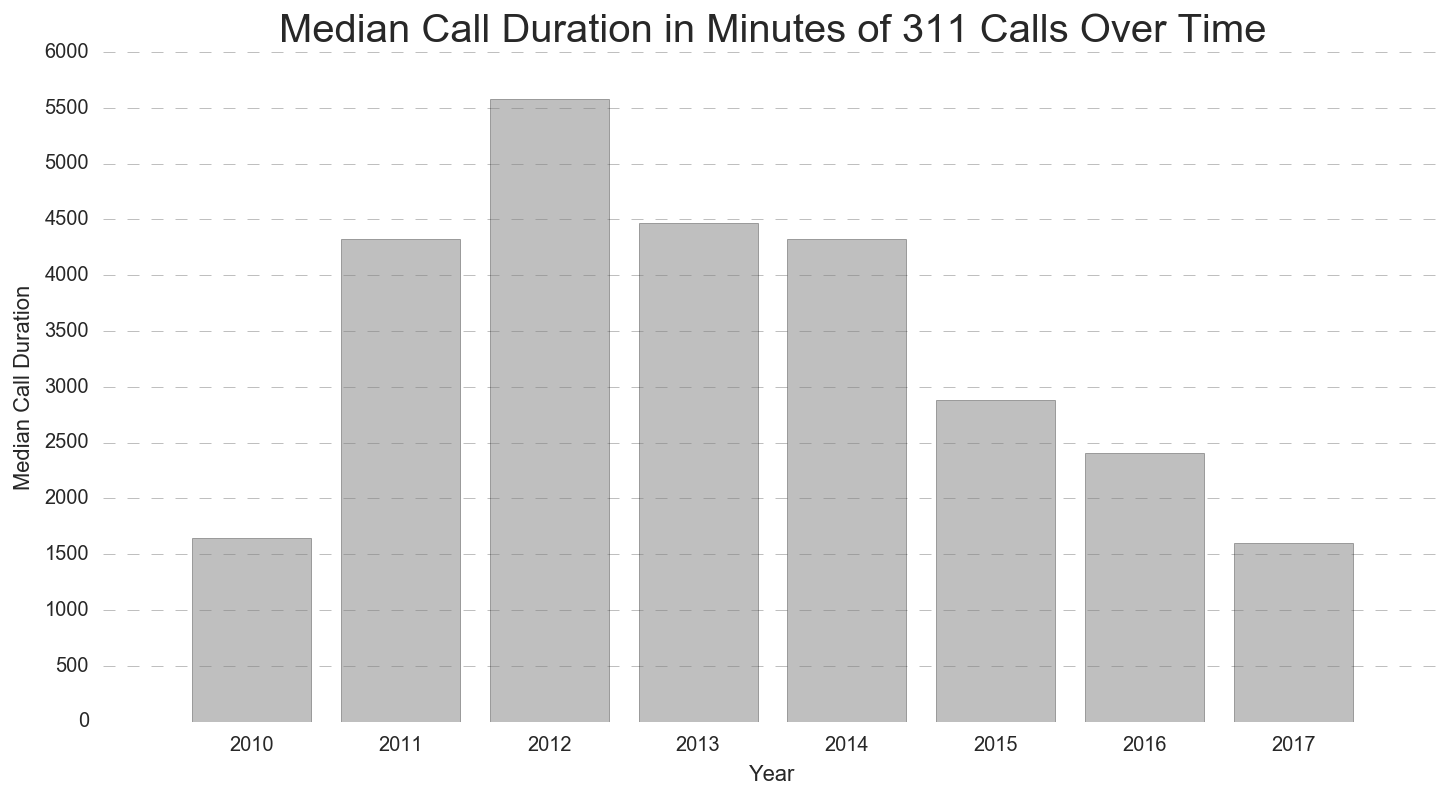

In [23]:
# Use full resolution of retina display
%config InlineBackend.figure_format = 'retina'

# use seaborn to set our graphing style. The style 'white' creates a white background for our graph
sns.set_style("white") 

# Assign x and y axes
x = call_duration['Created Year']
y = call_duration['median']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(12, 6))

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct call category and assign them to the x-axis
plt.yticks(np.arange(0, round(max(y),-1)+500, 500))
plt.xticks(x_pos, x)

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

# Give labels and titles
plt.ylabel("Median Call Duration")
plt.xlabel("Year")
plt.title("Median Call Duration in Minutes of 311 Calls Over Time",fontsize=20)

# Show the barplot
plt.show()

The trend is the same except from the first 2 years, where maybe the difference between the over-timed calls and the normal ones was a lot bigger comparing to the rest of the years. Let's take a look at the **means** to x-check every little assumption of improvement.

In [24]:
# List the median call duration per year
call_duration_mean = df.groupby('Created Year')['Call Duration'].apply(lambda x:np.mean(x)).reset_index(name='mean').sort_values(by='Created Year', ascending=1)
call_duration_mean

,Created Year,mean
0,2010,24923.217445
1,2011,25258.275850
2,2012,22074.606512
3,2013,22540.587801
4,2014,20851.244739
5,2015,17368.973681
6,2016,14170.625298
7,2017,6452.082321


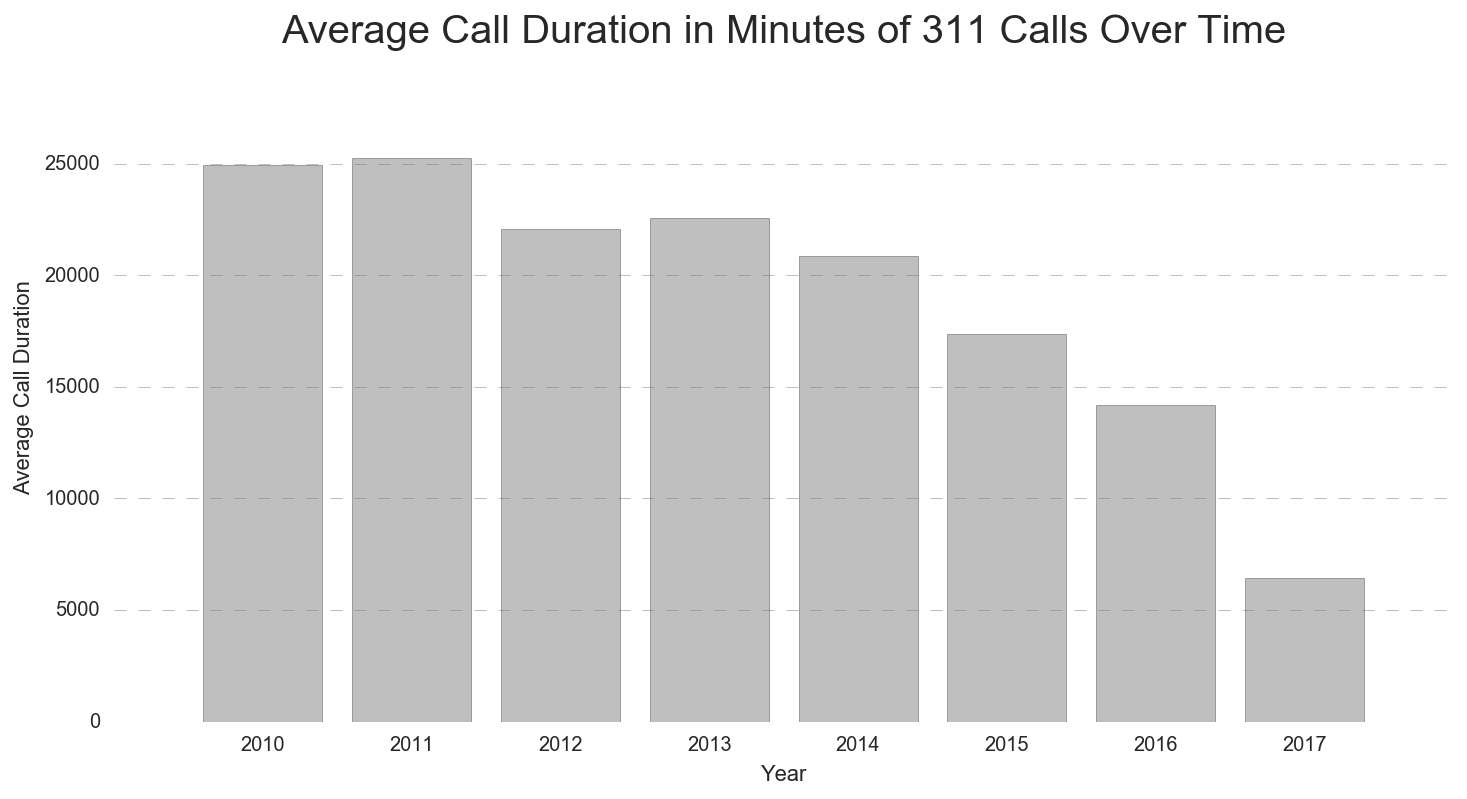

In [46]:
# Use full resolution of retina display
%config InlineBackend.figure_format = 'retina'

# use seaborn to set our graphing style. The style 'white' creates a white background for our graph
sns.set_style("white") 

# Assign x and y axes
x = call_duration_mean['Created Year']
y = call_duration_mean['mean']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(12, 6))

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct call category and assign them to the x-axis
plt.yticks(np.arange(0, round(max(y),-1)+1000, 5000))
plt.xticks(x_pos, x)

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

# Give labels and titles
plt.ylabel("Average Call Duration")
plt.xlabel("Year")
plt.title("Average Call Duration in Minutes of 311 Calls Over Time",fontsize=20)

# Show the barplot
plt.show()

It is clear now that the NY 311 department is **improving its call durations constantly over the years**. Nice!

Next inspections:
* What are the most long lasting categories of incidents
* 